In [2]:
import sys
sys.path.append('../src')

import pandas as pd

from utils.utils import remove_footnotes, remove_punctuation, remove_stopwords_vietnamese

from underthesea import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/all_wiki_data.csv')
df['label'] = df['label'].replace({
    0: "Natural Sciences",
    1: "Social Sciences",
    2: "Engineering",
    3: "Culture",
    4: "Other"
})
df.head()

,title,content,label
0,Melocalamus scandens,Melocalamus scandens là một loài thực vật có h...,Natural Sciences
1,Paleauletobius silenus,Paleauletobius silenus là một loài bọ cánh cứn...,Natural Sciences
2,Zoodes hirsutus,Zoodes hirsutus là một loài bọ cánh cứng trong...,Natural Sciences
3,Quốc kỳ Argentina,Quốc kỳ Argentina ( tiếng Tây Ban Nha : Bander...,Culture
4,Dundahera,Dundahera là một thị trấn thống kê ( census to...,Social Sciences


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    2224 non-null   object
 1   content  2224 non-null   object
 2   label    2224 non-null   object
dtypes: object(3)
memory usage: 52.2+ KB


In [5]:
def tokenize(text):
    list_word = word_tokenize(text)
    return list_word

In [6]:
df['tokenized_words'] = df['content'].apply(tokenize)

In [9]:
df['content'] = df['content'].apply(remove_footnotes)
df['content'] = df['content'].apply(remove_punctuation)
df['content'] = df['content'].apply(remove_stopwords_vietnamese)

AttributeError: 'list' object has no attribute 'split'

In [54]:
df.head(10)

,title,content,label,tokenized_words
0,Melocalamus scandens,Melocalamus scandens loài thực_vật hoa Hòa_thả...,Natural Sciences,"[Melocalamus, scandens, loài, thực_vật, hoa, H..."
1,Paleauletobius silenus,Paleauletobius silenus loài bọ cánh_cứng Rhync...,Natural Sciences,"[Paleauletobius, silenus, loài, bọ cánh_cứng, ..."
2,Zoodes hirsutus,Zoodes hirsutus loài bọ cánh_cứng Cerambycidae,Natural Sciences,"[Zoodes, hirsutus, loài, bọ cánh_cứng, Ceramby..."
3,Quốc kỳ Argentina,Quốc_kỳ Argentina tiếng Tây_Ban Nha_Bandera de...,Culture,"[Quốc_kỳ, Argentina tiếng, Tây_Ban Nha_Bandera..."
4,Dundahera,Dundahera thị_trấn thống_kê census town Gurgao...,Social Sciences,"[Dundahera, thị_trấn, thống_kê, census, town, ..."
5,Nạn khan hiếm nhu yếu phẩm tại Venezuela,Nạn khan_hiếm nhu yếu_phẩm Venezuela tiếng Tây...,Social Sciences,"[Nạn, khan_hiếm, nhu yếu_phẩm, Venezuela, tiến..."
6,Siphocampylus imbricatus,Siphocampylus imbricatus loài thực_vật hoa Hoa...,Natural Sciences,"[Siphocampylus, imbricatus, loài, thực_vật, ho..."
7,Archidendron royenii,Archidendron royenii loài thực_vật hoa Đậu_Loà...,Natural Sciences,"[Archidendron, royenii, loài, thực_vật, hoa, Đ..."
8,Agylla vittata,Agylla vittata loài bướm đêm phân Arctiinae Er...,Natural Sciences,"[Agylla, vittata, loài, bướm, đêm, phân Arctii..."
9,"Laurens, Hérault",Laurens xã tỉnh Hérault Occitanie nam Pháp Xã ...,Social Sciences,"[Laurens, xã, tỉnh, Hérault Occitanie, nam, Ph..."


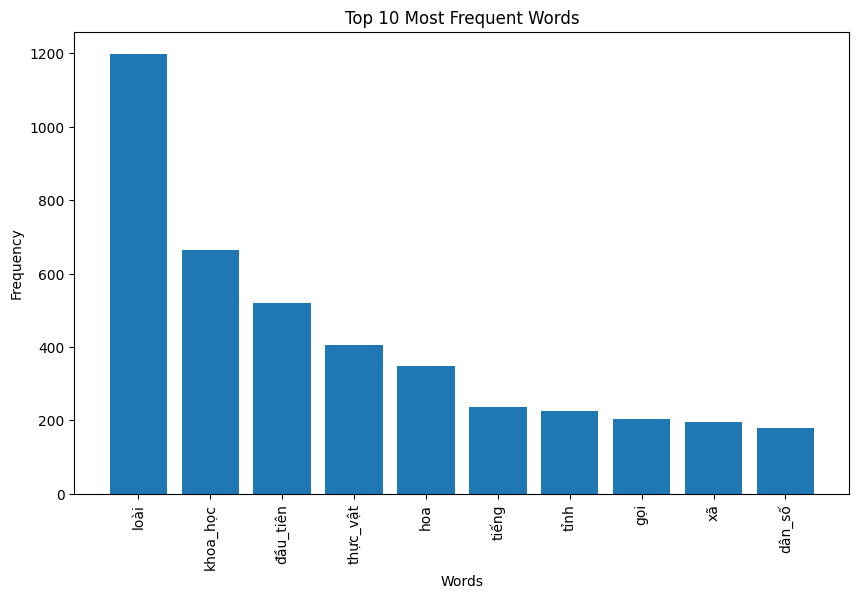

In [53]:
from collections import Counter
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing tokenized words
tokenized_words = df['tokenized_words'].explode().dropna()

# Tính toán tần suất của từng từ
word_counts = Counter(tokenized_words)

# Lấy danh sách các từ và tần suất tương ứng
words = list(word_counts.keys())
counts = list(word_counts.values())

# Sắp xếp theo tần suất giảm dần và chỉ lấy top 10
sorted_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)[:10]
top_words = [words[i] for i in sorted_indices]
top_counts = [counts[i] for i in sorted_indices]

# Vẽ biểu đồ tần suất cho top 10 từ
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=90)
plt.show()



In [1]:
from collections import Counter
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing tokenized words and labels
tokenized_words = df['tokenized_words'].explode().dropna()
labels = df['label']

# Tạo một bộ đếm từng nhãn
label_word_counts = {}

# Tính toán tần suất của từng từ cho mỗi nhãn
for label in labels.unique():
    label_words = tokenized_words[labels == label]
    word_counts = Counter(label_words)
    label_word_counts[label] = word_counts

# Vẽ biểu đồ cho mỗi nhãn và lưu vào các tệp hình ảnh khác nhau
for i, (label, word_counts) in enumerate(label_word_counts.items(), start=2):
    # Lấy danh sách các từ và tần suất tương ứng
    words = list(word_counts.keys())
    counts = list(word_counts.values())

    # Sắp xếp theo tần suất giảm dần và chỉ lấy top 10
    sorted_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)[:10]
    top_words = [words[i] for i in sorted_indices]
    top_counts = [counts[i] for i in sorted_indices]

    # Vẽ biểu đồ tần suất cho top 10 từ của mỗi nhãn
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Words for Label: {label}')
    plt.xticks(rotation=90)
    plt.savefig(f'../img/images_{i}.png', bbox_inches='tight')
    plt.show()


NameError: name 'df' is not defined

## Label frequency

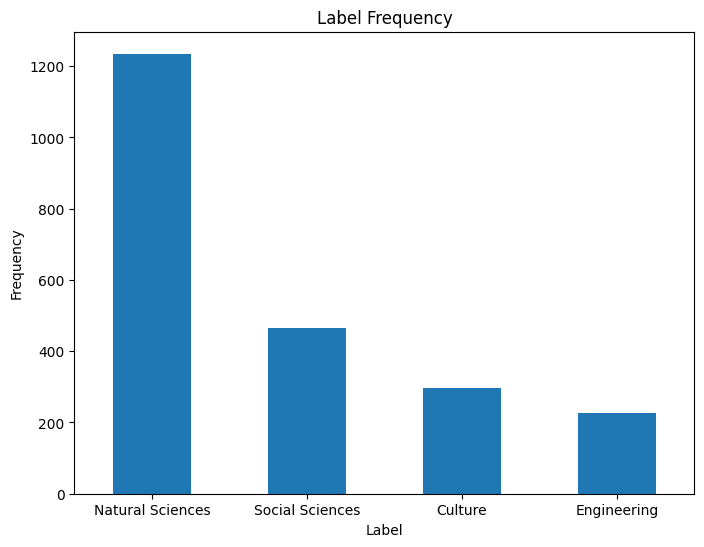

In [23]:
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Label Frequency')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.show()

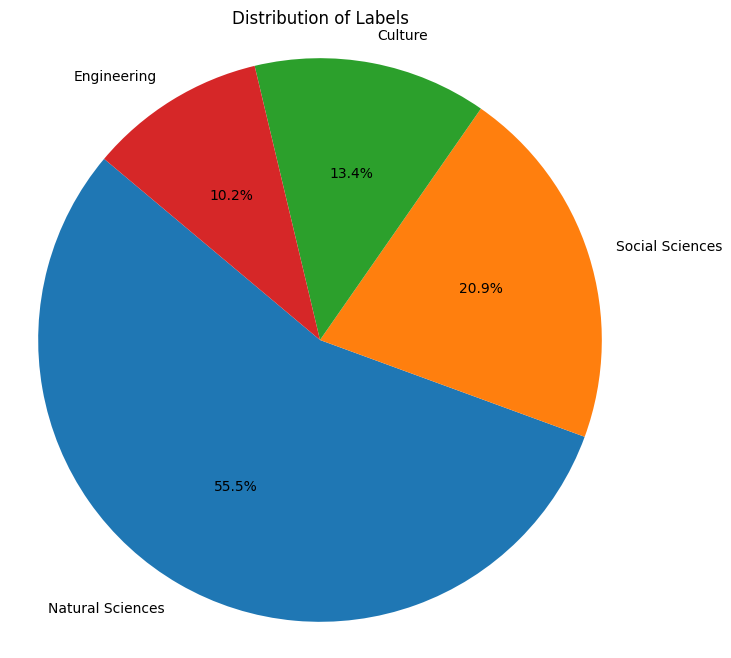

In [24]:
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()


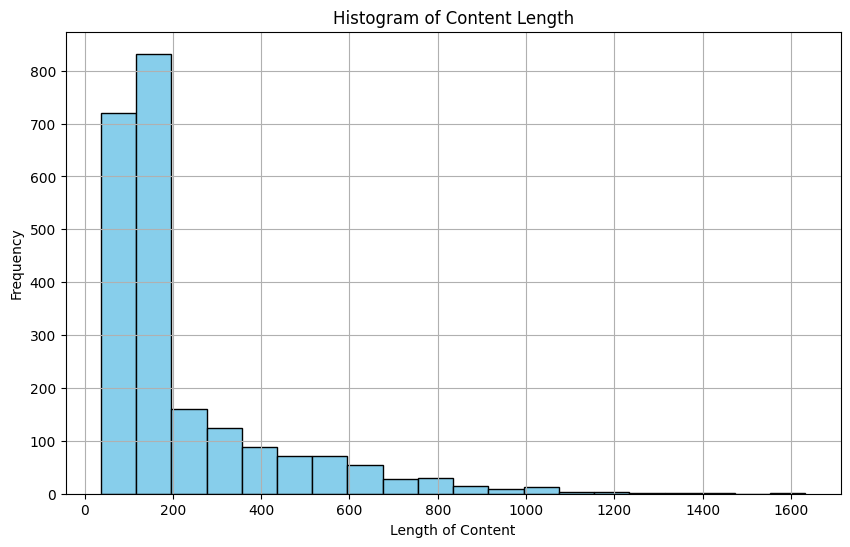

In [9]:
# Tạo histogram
plt.figure(figsize=(10, 6))
plt.hist(df['content'].apply(len), bins=20, color='skyblue', edgecolor='black')  # Độ dài của nội dung
plt.xlabel('Length of Content')
plt.ylabel('Frequency')
plt.title('Histogram of Content Length')
plt.grid(True)
plt.show()

In [67]:
df['content_length'] = df['content'].apply(len)

In [68]:
# Lấy ra top 10 content ngắn nhất
top_10_shortest_content = df.nsmallest(10, 'content_length')

# In ra top 10 content ngắn nhất cùng với độ dài của chúng
print(top_10_shortest_content[['content', 'content_length']])



                              content  content_length
56                 275 TCN lịch La_Mã              18
193     Pitharatus chi nhện Araneidae              29
335     Oxysoma chi nhện Anyphaenidae              29
906     Peltolepis chi rêu Cleveaceae              29
1017    Physula chi bướm đêm Erebidae              29
105    Peplometus chi nhện Salticidae              30
1222   Torcy xã tỉnh PasdeCalais Pháp              30
2211   Champions_League có_thể chủ_đề              30
333   Elesotis chi bướm đêm Noctuidae              31
836   Tateanthus chi thực_vật hoa Mua              31


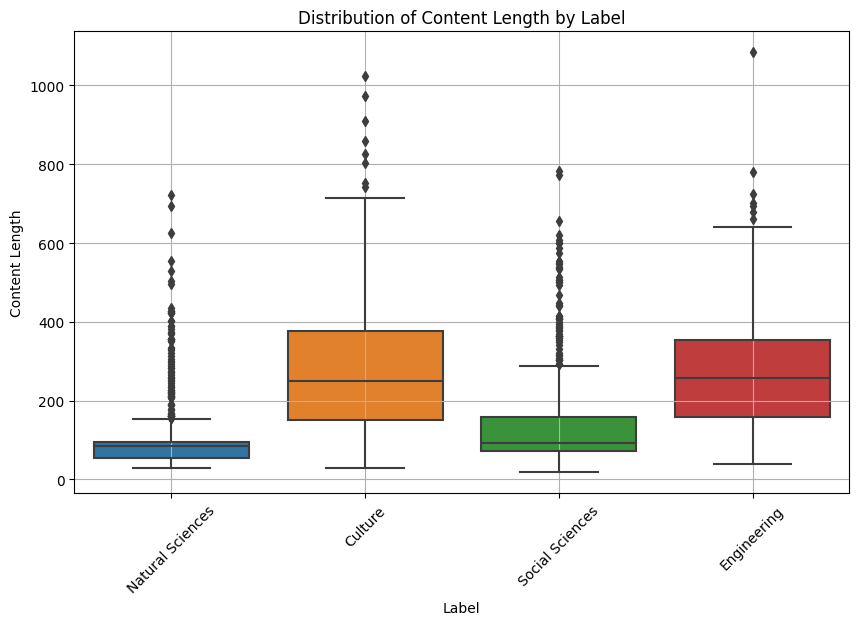

In [69]:

# Tạo box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='content_length')
plt.xlabel('Label')
plt.ylabel('Content Length')
plt.title('Distribution of Content Length by Label')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



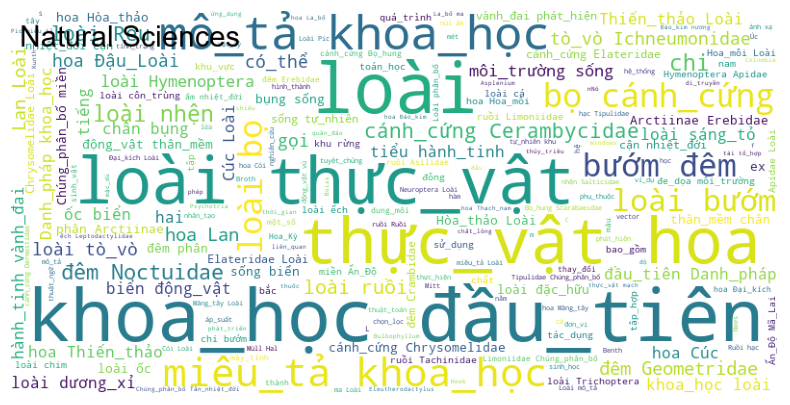

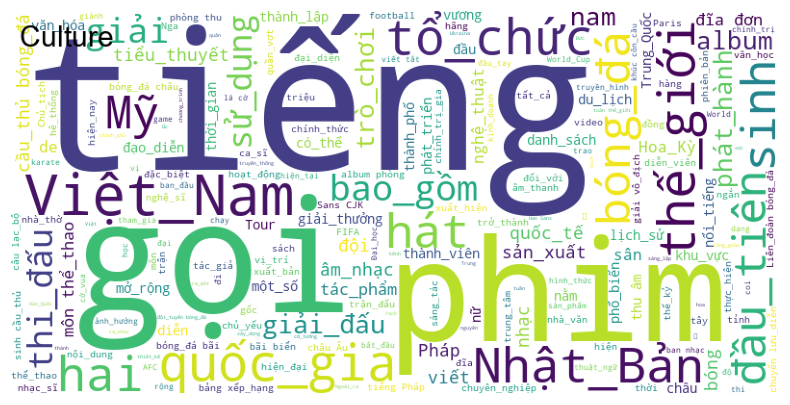

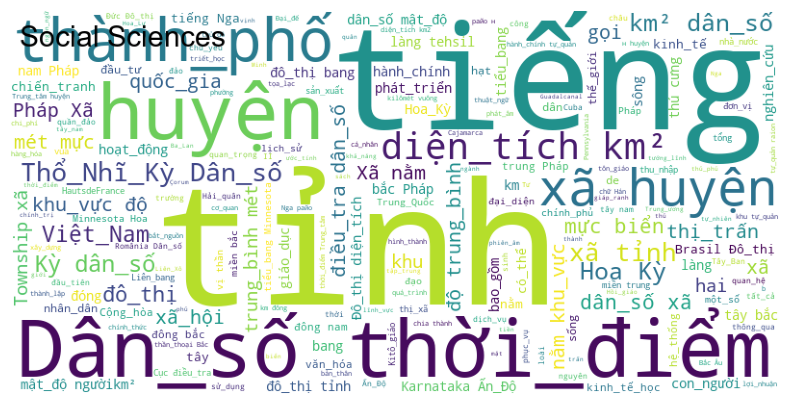

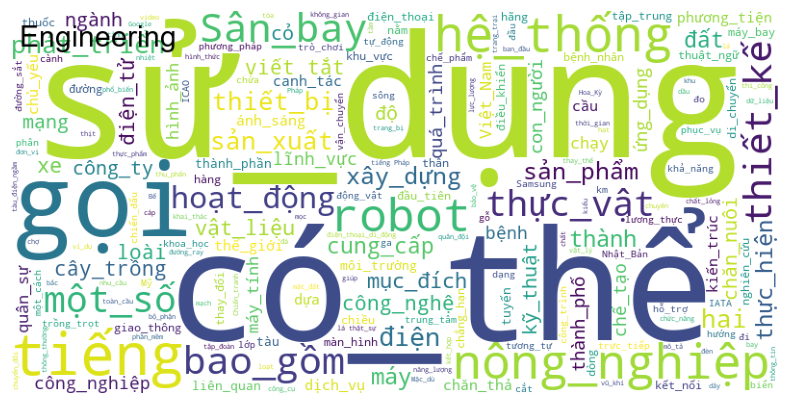

In [60]:
from PIL import Image, ImageDraw, ImageFont
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

def generate_wordcloud_with_label(text, label):
    # Tạo đối tượng WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Chuyển WordCloud thành mảng numpy
    wordcloud_array = wordcloud.to_array()

    # Tạo hình ảnh từ mảng numpy
    img = Image.fromarray(wordcloud_array)

    # Tạo một đối tượng vẽ
    draw = ImageDraw.Draw(img)

    # Thêm nhãn vào ảnh
    font = ImageFont.truetype("arial.ttf", 30)  # Lựa chọn font và kích cỡ chữ
    draw.text((10, 10), label, fill="black", font=font)  # Vẽ văn bản tại vị trí (10, 10)

    # Hiển thị ảnh
    plt.figure(figsize=(10, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Tạo WordCloud cho từng nhóm và thêm tên nhãn
for label in df['label'].unique():
    label_str = str(label)  # Chuyển đổi label sang chuỗi trước khi sử dụng
    text = ' '.join(df[df['label'] == label]['content'])
    generate_wordcloud_with_label(text, label_str)
